In [ ]:
import numpy as np #lenear algebra
import pandas as pd #data processing, CSV file I/O

#keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt #side-stepping mpl back-end
import matplotlib.gridspec as gridspec #subplots
import seaborn as sns
import os # accessing directory structure


#Import models from scikit learn Module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import precision_score , recall_score , confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler , OrdinalEncoder , LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



***Load the data***

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
breast_cancer = pd.read_csv("/content/Breast_Cancer.csv", header = 0)

In [ ]:
# print first 5 rows of the dataset
breast_cancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
# print last 5 rows of the dataset
breast_cancer.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [ ]:
# number of rows and columns in the dataset
breast_cancer.shape

(4024, 16)

In [ ]:
# getting some info about the data
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
# checking for missing values
breast_cancer.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
print(f"There are {breast_cancer.duplicated().sum()} duplicates data")
breast_cancer.loc[breast_cancer.duplicated(keep=False)].sort_values(by=breast_cancer.columns.to_list())

There are 1 duplicates data


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [ ]:
breast_cancer.drop_duplicates(inplace=True)

In [ ]:
print(f"There are {breast_cancer.duplicated().sum()} duplicates data")
breast_cancer.loc[breast_cancer.duplicated(keep=False)].sort_values(by=breast_cancer.columns.to_list())

There are 0 duplicates data


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status


In [ ]:
# statistical measures about the data
breast_cancer.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
# checking the distribution of Target Variable
breast_cancer['Status'].value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

#**Visualization**

In [ ]:
object_data=breast_cancer.select_dtypes(include='object').columns
int_data=breast_cancer.select_dtypes(include='int64').columns

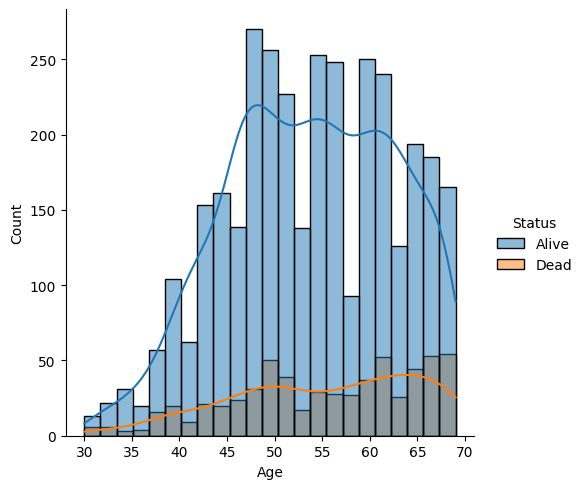

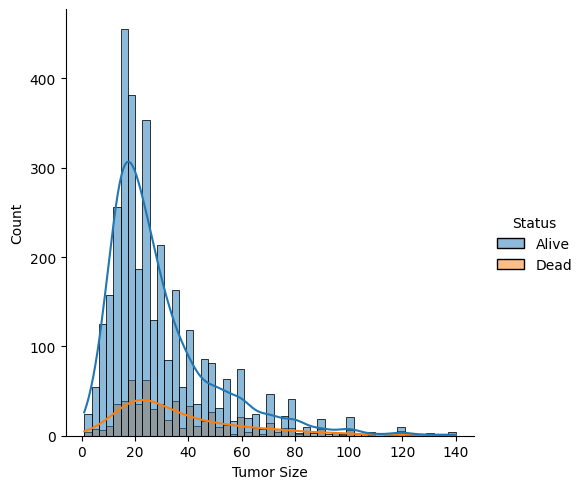

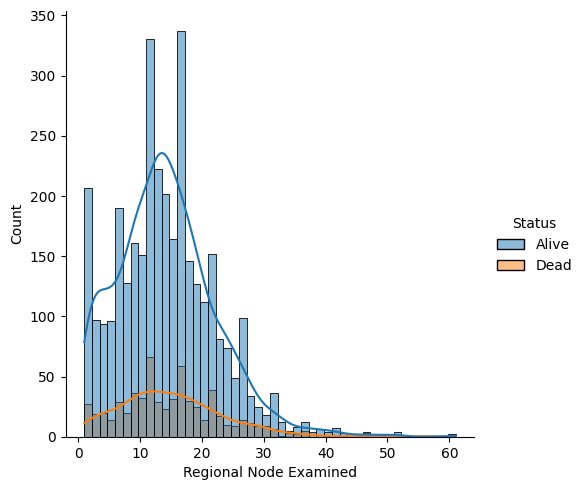

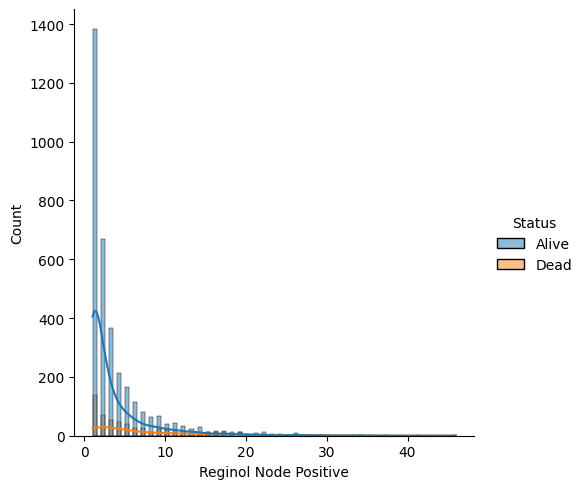

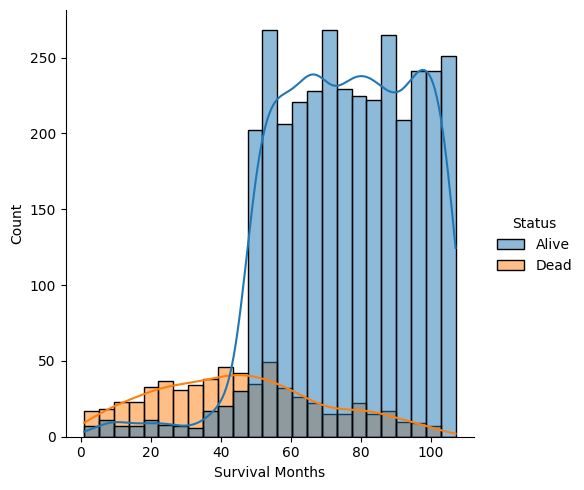

In [ ]:
def numerical_plot(dataset , var1 ):
    return sns.displot( data=dataset , x=var1 , kde=True , hue="Status")

for col in int_data:
    numerical_plot(breast_cancer , col)

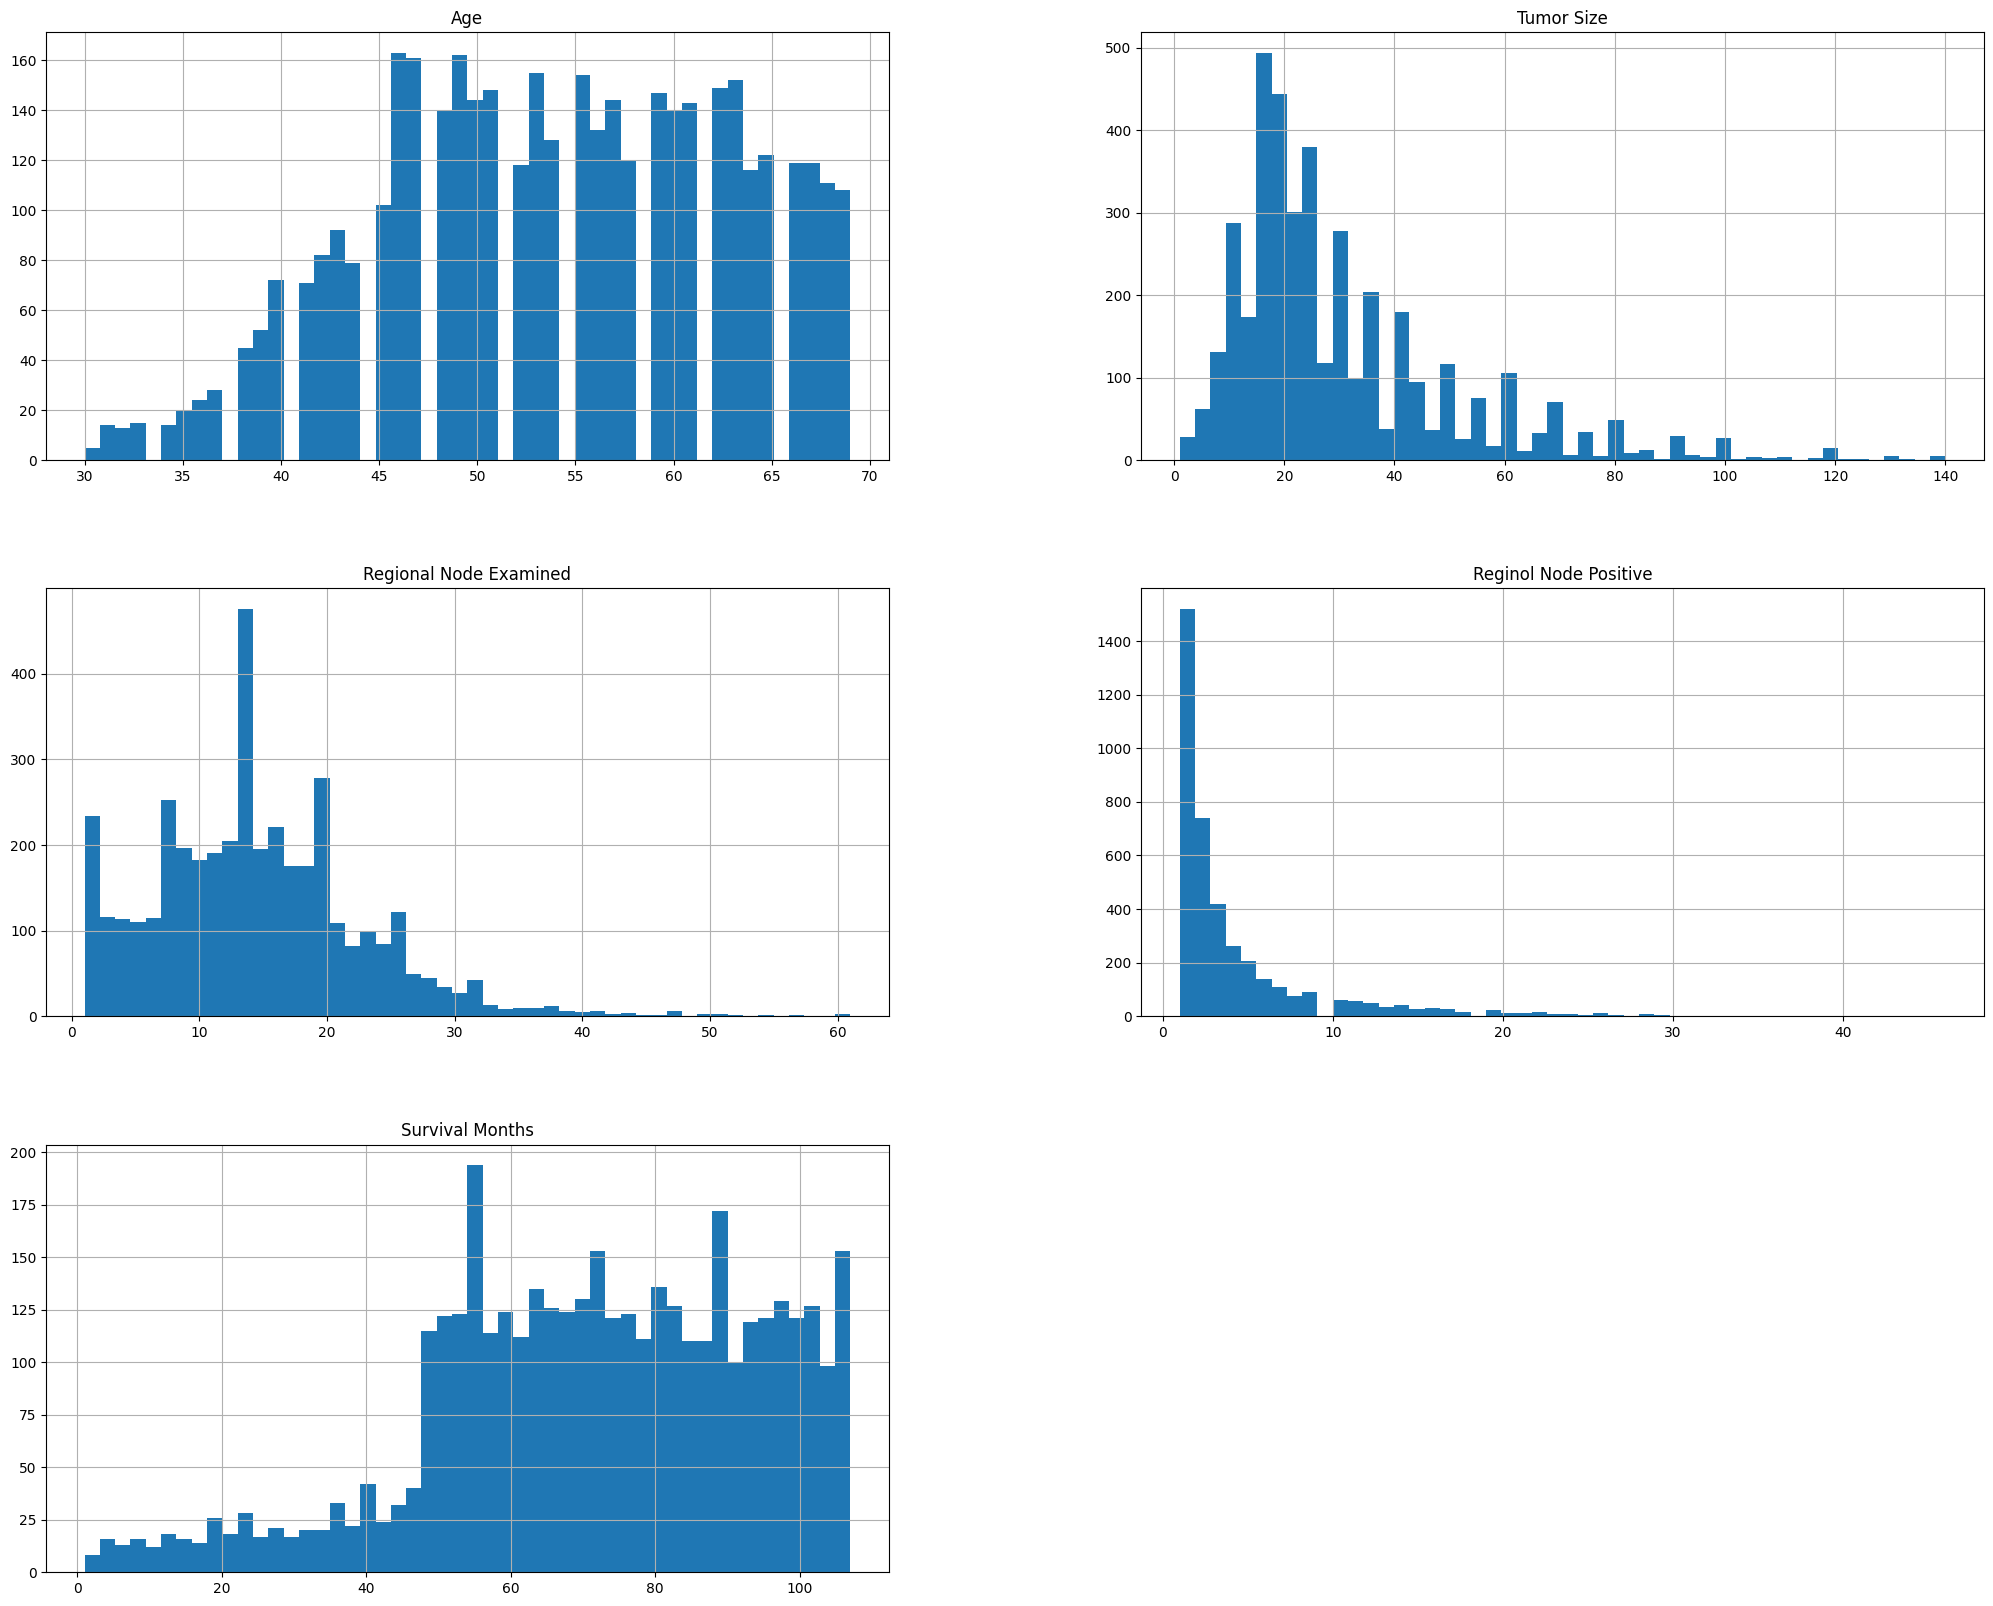

In [ ]:
breast_cancer.hist(bins=50, figsize=(25, 20))
plt.show()


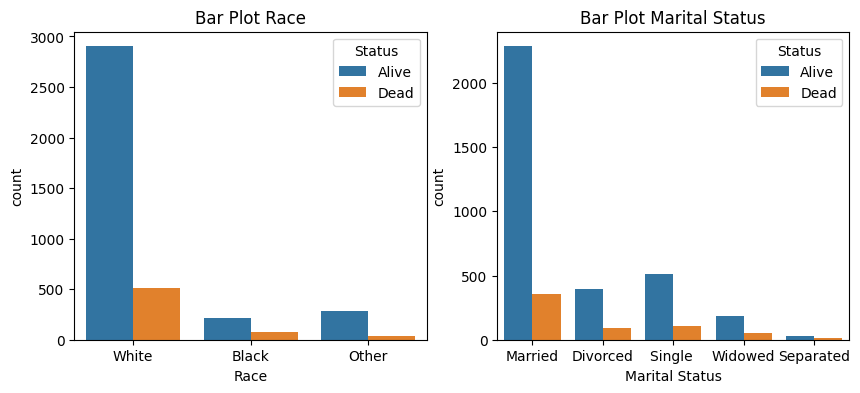

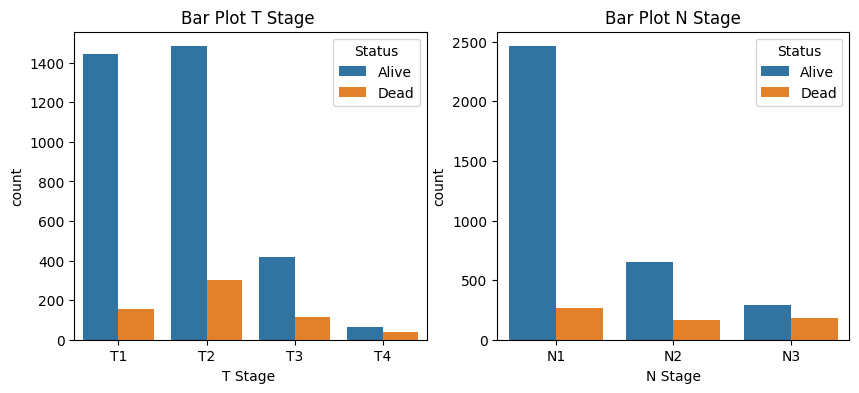

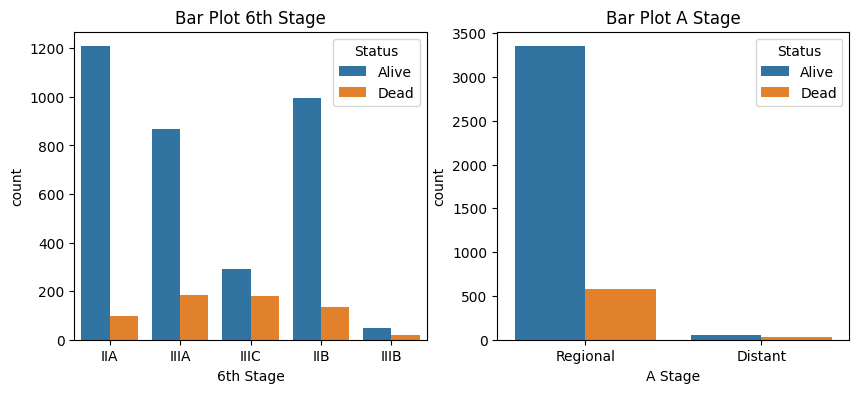

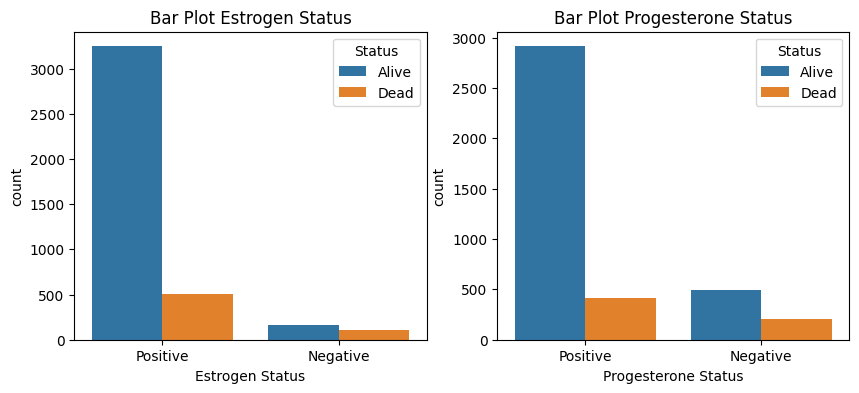

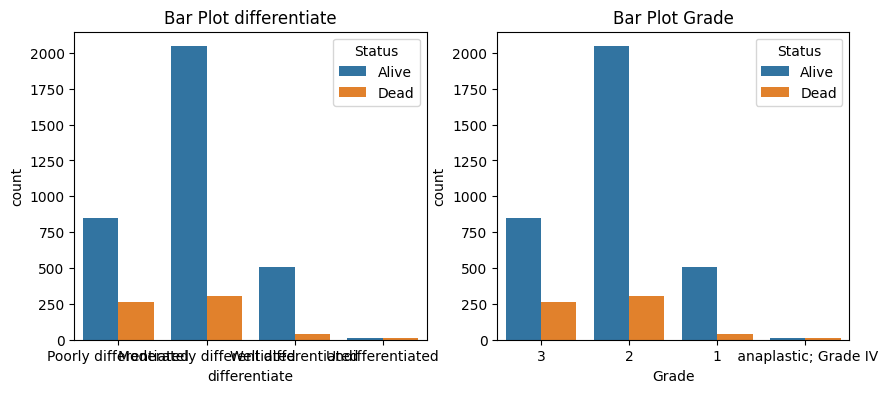

In [ ]:
def plot_object(dataset , var1 , var2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.countplot(x=var1 , data=dataset, hue='Status',ax=axes[0])
    axes[0].set_title(f'Bar Plot {var1}')
    sns.countplot(x=var2,  data=dataset, hue='Status', ax=axes[1])
    axes[1].set_title(f'Bar Plot {var2}')
plot_object(breast_cancer , 'Race' , 'Marital Status')
plot_object(breast_cancer , 'T Stage ', 'N Stage')
plot_object(breast_cancer , '6th Stage' , 'A Stage')
plot_object(breast_cancer , 'Estrogen Status', 'Progesterone Status')
plot_object(breast_cancer , 'differentiate', 'Grade')

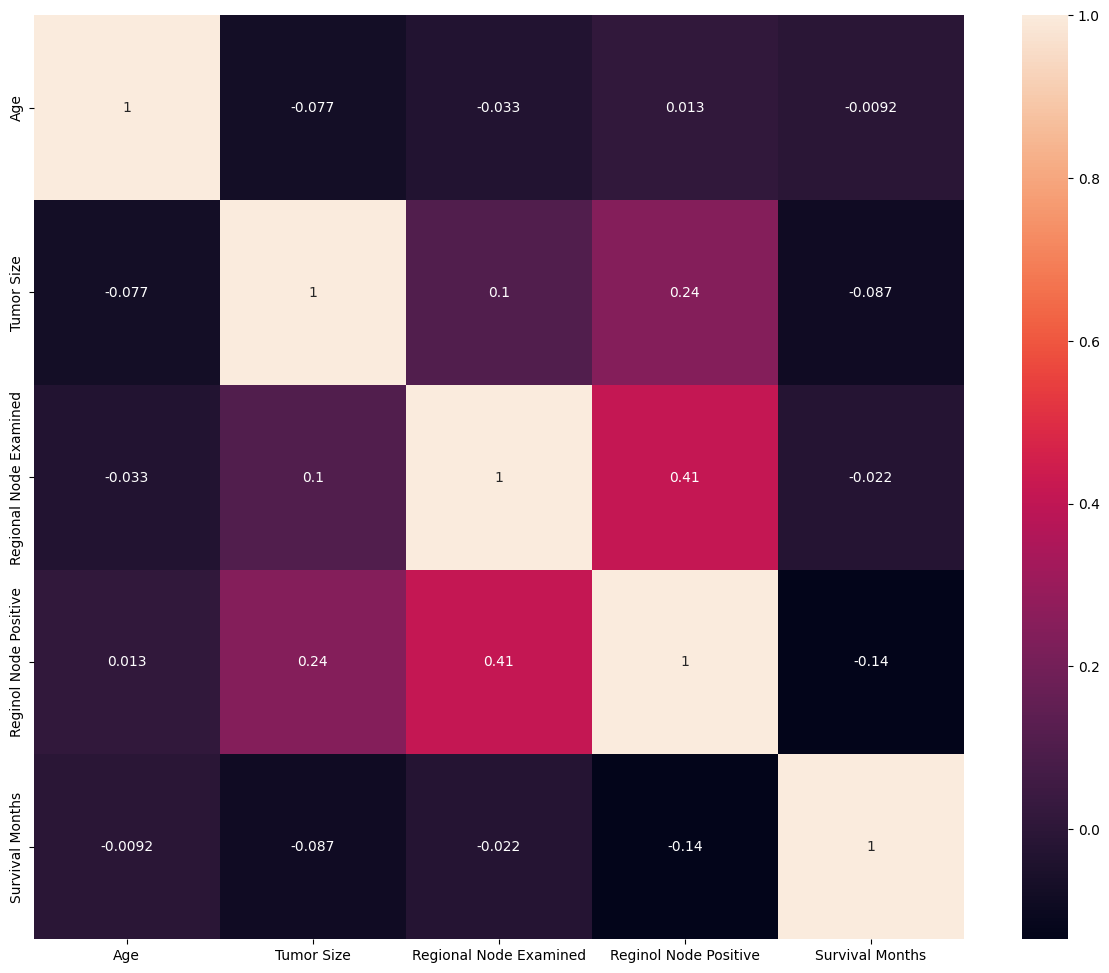

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(breast_cancer.corr(),annot=True)
plt.show()

In [ ]:
pip install featurewiz

In [ ]:
from featurewiz import featurewiz

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (4023, 16)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S

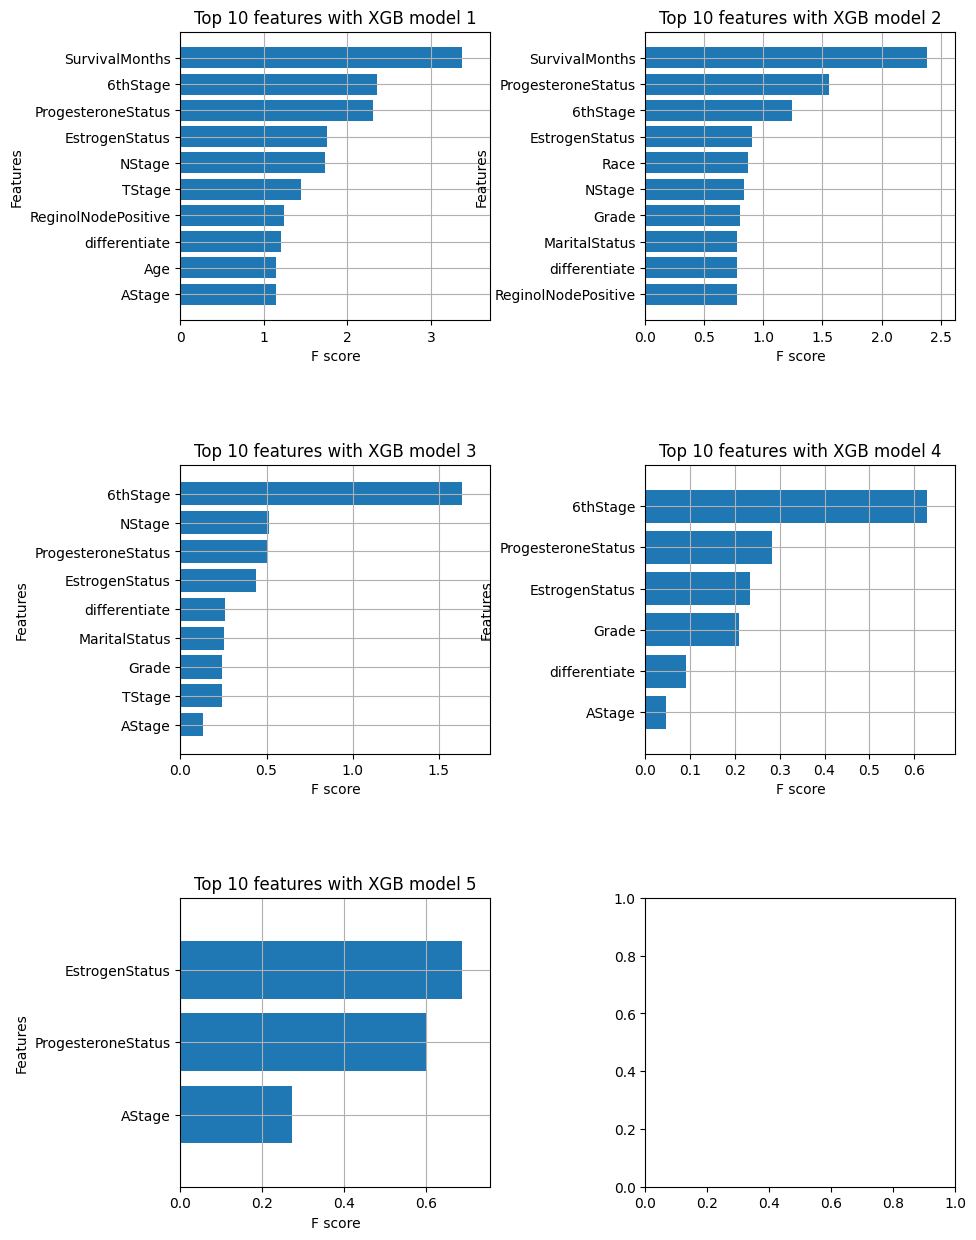

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 11 important features:
['SurvivalMonths', 'Age', 'TumorSize', 'ReginolNodePositive', 'MaritalStatus', 'TStage', 'NStage', '6thStage', 'ProgesteroneStatus', 'EstrogenStatus', 'AStage']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 11 important features and a train dataframe


In [ ]:
target = 'Status'
features= featurewiz(breast_cancer, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    breast_cancer = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {breast_cancer}', fontsize=15)
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Breast_Cancer.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/Breast_Cancer.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Breast_Cancer.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


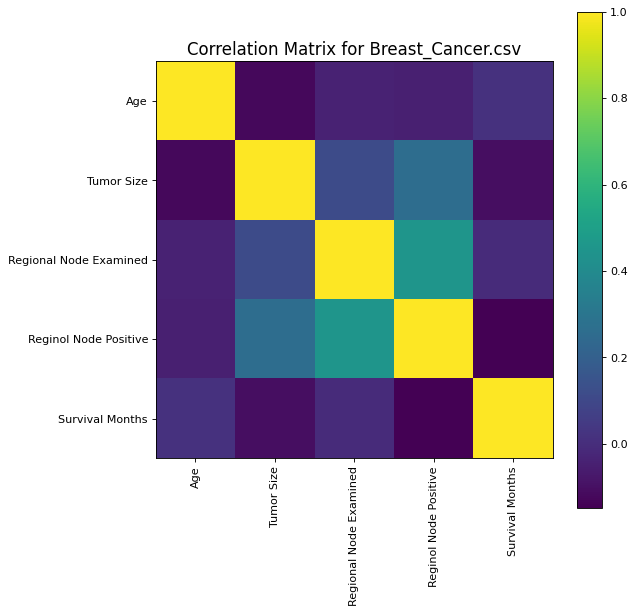

In [ ]:
plotCorrelationMatrix(df1, 8)

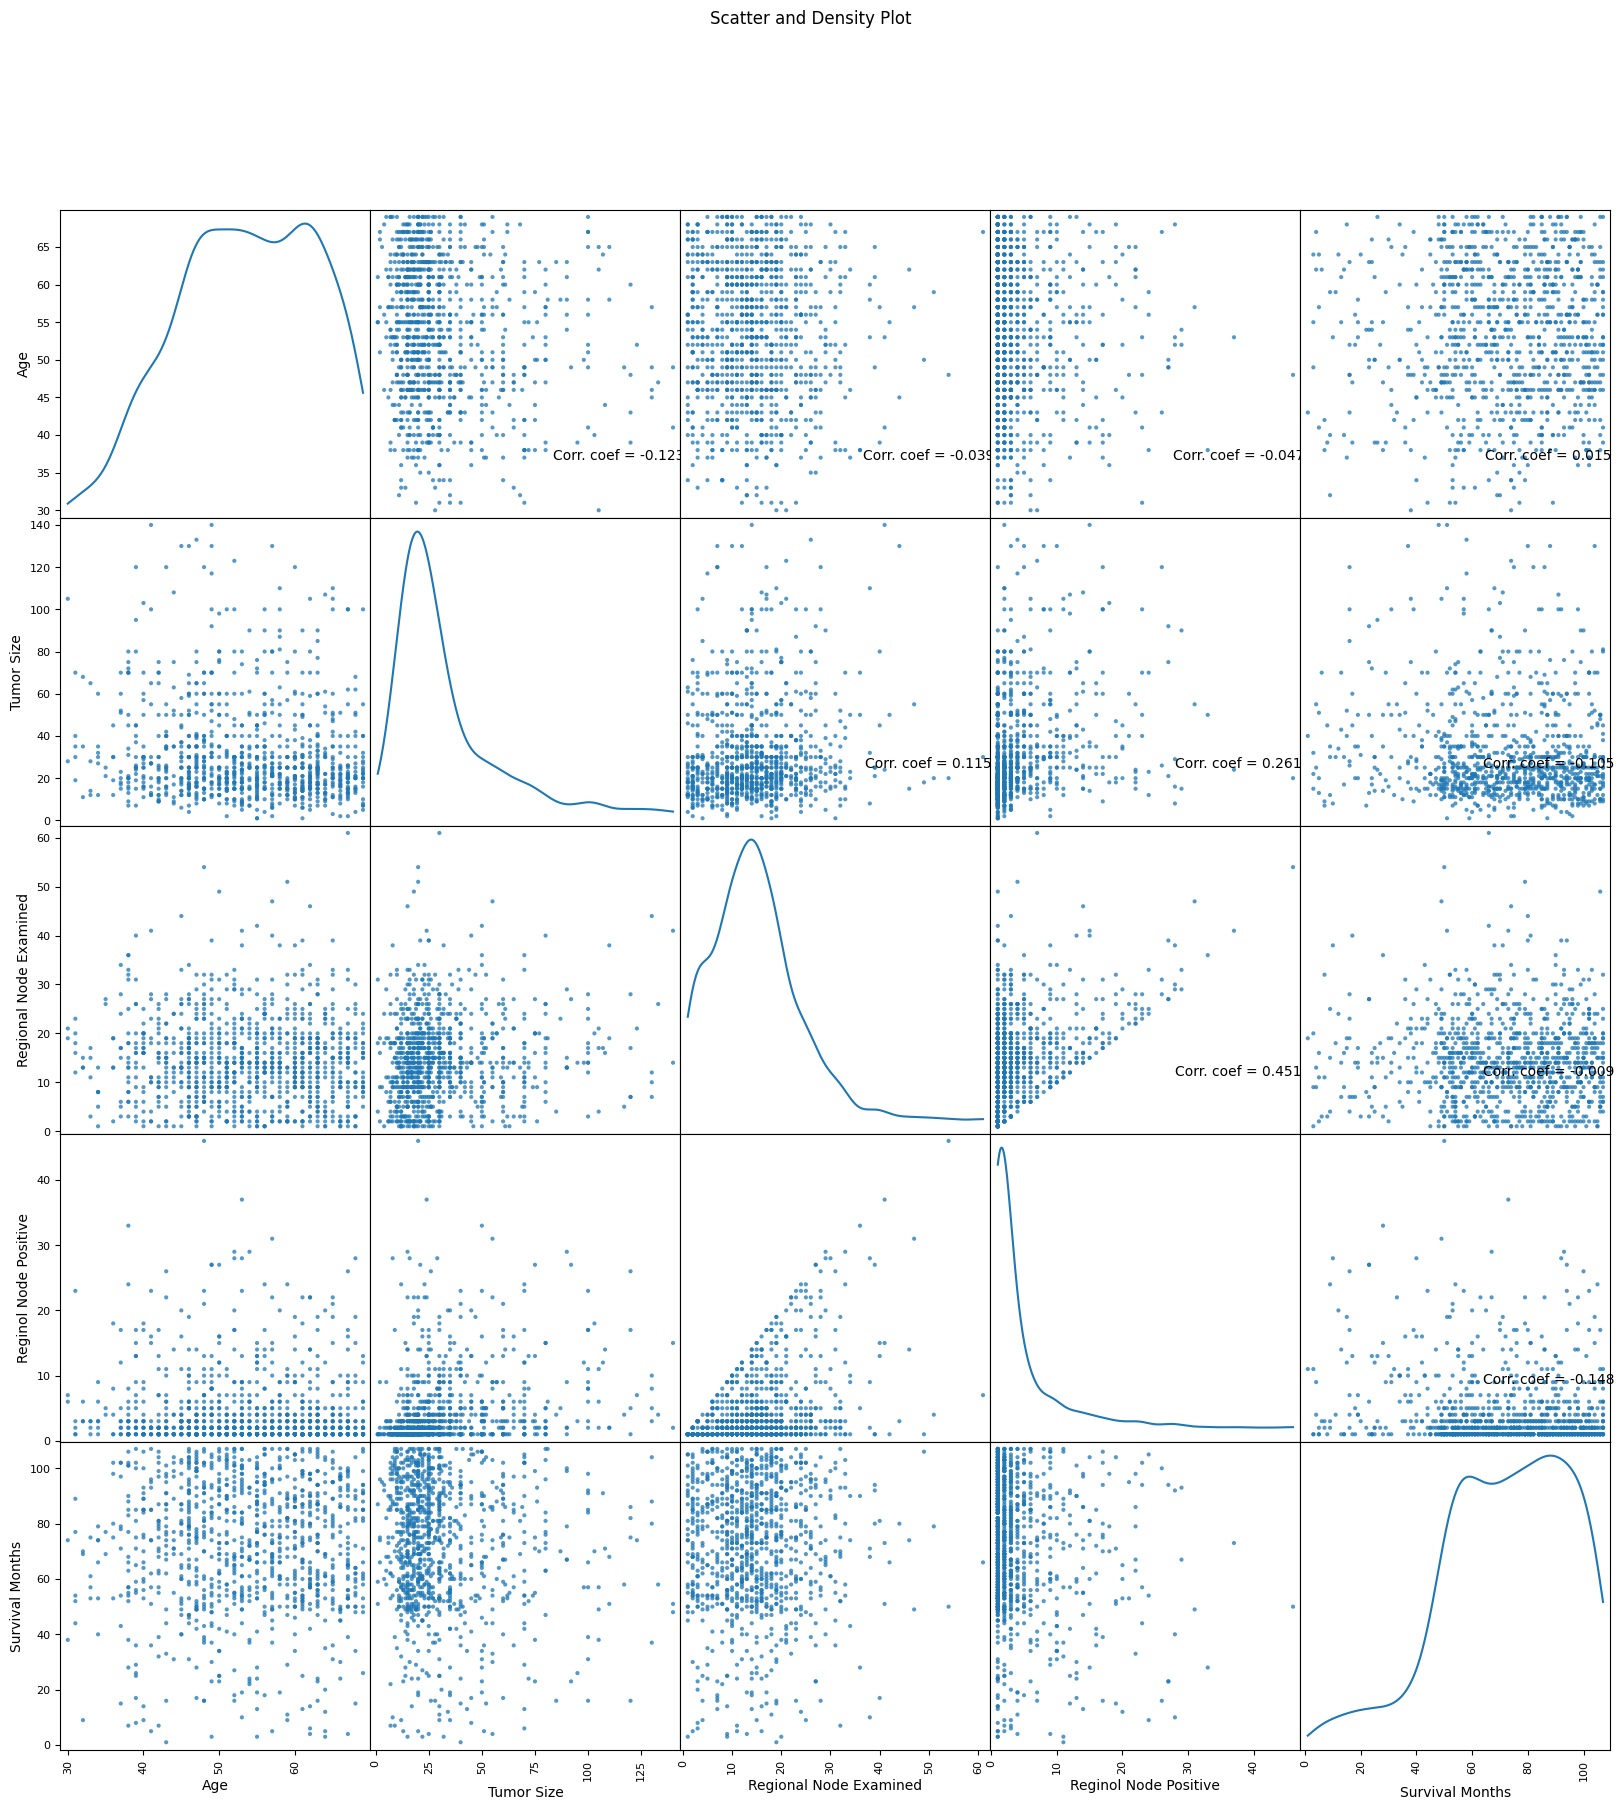

In [ ]:
plotScatterMatrix(df1, 20, 10)

# **Feature Engineering**

In [ ]:
def TNM_Tumor_Stage(dataset , var1 , var2 , var3):
    TNM =dataset[var1] +"-"+ dataset[var2] +"-"+ dataset[var3]
    return TNM
breast_cancer["TNM Tumor Stage"]=TNM_Tumor_Stage(breast_cancer , 'T Stage ', 'N Stage', 'A Stage')

In [ ]:
def Hormon_State(dataset , var1 , var2 ):
    return  ["ER-"] +  dataset[var1]+ " "+["PR-"]+dataset[var2]
breast_cancer["Hormon Status"]=Hormon_State(breast_cancer , 'Estrogen Status', 'Progesterone Status')

In [ ]:
def Lymph_node_Ratio(dataset , var1  , var2):
    return round(dataset[var1] / dataset[var2] , 2)
breast_cancer["Lymph_Node_Ratio"]=Lymph_node_Ratio(breast_cancer , 'Reginol Node Positive', 'Regional Node Examined')

In [ ]:
def tumor_size(tumor_size):
    if tumor_size <= 20:
        return "Small"
    elif 20< tumor_size <= 50:
        return "Medium"
    elif tumor_size > 50:
        return "Large"
breast_cancer['Tumor Size Category'] = breast_cancer['Tumor Size'].apply(tumor_size)

In [ ]:
def month_to_years(var):
        year_survived=var/12
        return round(year_survived , 1)
breast_cancer['Year_Survived'] = breast_cancer['Survival Months'].apply(month_to_years)

In [ ]:
breast_cancer['Status'] = breast_cancer['Status'].map({"Alive":1 , "Dead":0})

# **Training**

**Splitting_train_test**

In [ ]:
X = breast_cancer.drop(columns='Status', axis=1)
y = breast_cancer['Status']

In [ ]:
print(X)

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately d

In [ ]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Status, Length: 4023, dtype: int64


In [ ]:
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size=0.2 , random_state=42, stratify = y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4023, 20) (3218, 20) (805, 20)


In [ ]:
breast_cancer["Status"] = [float(str(i).replace(",", "")) for i in breast_cancer["Status"]]

# **Prepossecing**

In [ ]:
list_int=list(X_train[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive','Survival Months','Lymph_Node_Ratio' , 'Year_Survived']])
list_1hot=list(X_train[['Race', 'Marital Status', 'differentiate', 'Estrogen Status', 'Progesterone Status' , 'TNM Tumor Stage' , 'Hormon Status', ]])
list_ordinal=list(X_train[[ 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size Category']])


coltransformer= ColumnTransformer([ ('std'  ,MinMaxScaler() , list_int) ,
                                    ('1hot' ,OneHotEncoder() , list_1hot) ,
                                     ('ordinal', OrdinalEncoder(), list_ordinal),
                                  ])

In [ ]:
X_train_pre=coltransformer.fit_transform(X_train)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pre, y_train)

# **Model Training**

In [ ]:
rf=RandomForestClassifier(n_estimators=600 , max_depth=17) #I found this values through GridSearchCV
xgboost=xgb.XGBClassifier()

In [ ]:
## xgboost
y_pred=cross_val_predict(xgboost ,X_train_resampled ,  y_train_resampled , cv=5)
print(f"precision score is : {precision_score(y_train_resampled , y_pred)}")
print(f"recall score  is : {recall_score(y_train_resampled , y_pred)}")

precision score is : 0.8921433494141972
recall score  is : 0.950091743119266


In [ ]:
#RandomForest
y_pred=cross_val_predict(rf , X_train_resampled, y_train_resampled , cv=5)
print(f'the recall score is : {recall_score(y_train_resampled , y_pred)}')
print(f'the precision score is : {precision_score(y_train_resampled , y_pred)}')

the recall score is : 0.9247706422018349
the precision score is : 0.9302325581395349


In [ ]:
y_probs = cross_val_predict(xgboost,X_train_resampled ,  y_train_resampled, cv=5, method='predict_proba')[:, 1]

threshold = 0.3
y_pred = (y_probs >= threshold).astype(int)

recall = recall_score(y_train_resampled, y_pred)
precision = precision_score(y_train_resampled, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")

Recall: 0.9710091743119266
Precision: 0.8647058823529412
